In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
from PIL import Image

In [2]:
# set some globals, which are used across the remaining functions
Image_width = 28
Image_height = 28
Image_Channels = 1
IMAGE_SHAPE = (Image_width,Image_height,Image_Channels)
NUM_CLASSES = 10
# training parameters
NUM_EPOCHS = 30
BATCH_SIZE = 128

In [3]:
# No Test labels so not using!! 
# train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

# y_train = train_df['label']
# X_train = train_df.drop('label', axis=1)
# X_test = test_df

## Data  Cleaning and Parsing

In [149]:
train_df = pd.read_csv("../kaggleData/train.csv")
# test_df = pd.read_csv("../kaggleData/test.csv")

fullX = train_df.iloc[:, 1:].values # get all row for every other column
fullY = train_df.iloc[:, :1].values # get every row for label
length = fullX.shape[0]
X_train, X_test, y_train, y_test = train_test_split(fullX, fullY, test_size = 0.2, random_state=1)

In [150]:
X_train = X_train.reshape(33600, 28, 28)
X_test = X_test.reshape(8400, 28, 28)

In [6]:
train_full, validate_full = train_test_split(train_df, test_size=0.20, random_state=42)


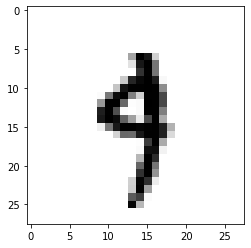

In [7]:
image_index = 3332# may select anything up to 60,000
plt.imshow(X_train[image_index], cmap='binary') # Show the image

In [152]:
X_train = (X_train.astype('float32') / 255.0)
X_test = (X_test.astype('float32') / 255.0)

x_shape = X_train.shape
x_shape

(33600, 28, 28)

## Creating Simple TensorFlow model

In [153]:
# Testing Ott's Cats and dog model
model = Sequential()

# should feed in input shape [28,28]
# only looking at image height and width

model.add(Flatten(input_shape=[28,28]))

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [154]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 573,104
Trainable params: 573,104
Non-trainable params: 0
________________________________________________

In [155]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [187]:
y_train_funky

array([array([], dtype=int64), array([2], dtype=int64),
       array([], dtype=int64), ..., array([], dtype=int64),
       array([9], dtype=int64), array([], dtype=int64)], dtype=object)

In [184]:
X_train_funky.shape

(24000, 28, 28)

In [185]:
X_train_funky = X_train_funky.reshape(24000, 28, 28)
X_test_funky = X_test_funky.reshape(6000, 28, 28)

In [186]:
model.fit(X_train_funky, y_train_funky, epochs=20)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

## Plotting our predicted Values with the digit image

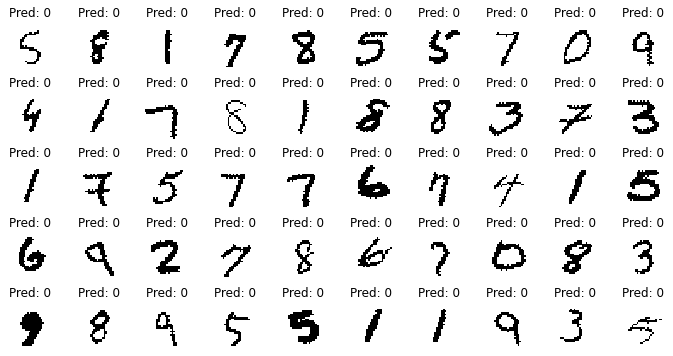

In [180]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
predicted_val = []
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test_funky[index], cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test_funky[index:index+1])[0]
        predicted_val.append(pred)
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Accuracy of Model

In [14]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

0.9758333333333333

## Results from doing these tests

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### accuracy^ 0.9792857142857143

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))
            
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9783333333333334

EPOCHS = 30 

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

### Accuracy ^ 0.9763095238095238

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
#potato = confusion_matrix(y_test, newVals)
#potato

In [17]:
#preds = model.predict_classes(X_test)
#output_dict = {"ImageId": np.arange(1, len(preds) + 1, 1), "label": preds}
#preds_df = pd.DataFrame(output_dict)

In [18]:
#preds_df

In [19]:
#preds

In [20]:
#model.score(X_train,X_test)

In [21]:
model = Sequential()

# only looking at image height and width
model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

# Create Pyramid-like sequence for neural net
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation='softmax')) # output activation should be softmax for classication > 2 output classes

# Convolution Models

In [22]:
K.clear_session()

from tensorflow.keras.utils import to_categorical

print('Before preprocessing:')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

# one-hot encode labels to 10 output classes corresponding to digits 0-9
y_train = to_categorical(y_train, 10)

# reshape the image arrays (make 2D arrays instead of 3D arrays)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print('After preprocessing: ')
print(' - X_train.shape = {}, y_train.shape = {}'.format(X_train.shape, y_train.shape))
print(' - X_test.shape = {}'.format(X_test.shape))

Before preprocessing:
 - X_train.shape = (33600, 28, 28), y_train.shape = (33600, 1)
 - X_test.shape = (8400, 28, 28)
After preprocessing: 
 - X_train.shape = (33600, 28, 28, 1), y_train.shape = (33600, 10)
 - X_test.shape = (8400, 28, 28, 1)


In [23]:
def build_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(6), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE)) # **** KEEP THIS TOO 
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, kernel_size=(3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, kernel_size=(2), padding='same', activation='relu',
                input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    ## Add desnse layers 
    model.add(Dense(32, activation = 
                    'relu'))
    model.add(Dropout(0.45))
    # output is softmax for 10 classes
    model.add(Dense(10,activation = 'softmax')) # ****** NEED THIs STRIP TO THIS AND A INPUT LAYER 
    adam = optimizers.Adam(lr = 0.001)
    
    model.compile(optimizer = adam, loss='categorical_crossentropy', metrics=['acc'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [24]:
NUM_EPOCHS = 2
# go for small batch size then increase as we go... to prevent overfitting 
# need to know the optimization

In [25]:
def Rot(alpha):
    a = np.pi*alpha/180
    R = np.array([[np.cos(a), -np.sin(a)],
                 [np.sin(a), np.cos(a)]])
    return R

In [27]:
import matplotlib.image as mpimg

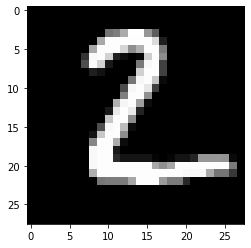

In [28]:
rotatedKK = mpimg.imread("../train_img/train_1.png")
imgplot = plt.imshow(rotatedKK)

## MAKING IMAGE FUNKYYYY

In [138]:
y_train

array([[1],
       [3],
       [2],
       ...,
       [2],
       [1],
       [1]], dtype=int64)

In [174]:
FUNKY_SIZE = 30000

In [191]:
import gzip
import os
f = gzip.open('../fullDataset/t10k-labels-idx1-ubyte.gz','r')
f.read(8)

y_train_funky = []
for i in range(0, FUNKY_SIZE):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    y_train_funky.append(labels)

# trying to change to numpy array
y_train_funky_np = np.array(y_train_funky)
y_train_funky_np

<ipython-input-191-93de90589f4a>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_train_funky_np = np.array(y_train_funky)


array([array([7], dtype=int64), array([2], dtype=int64),
       array([1], dtype=int64), ..., array([], dtype=int64),
       array([], dtype=int64), array([], dtype=int64)], dtype=object)

In [176]:
image_names = os.listdir("./../train_img")[:FUNKY_SIZE]
image_names

['train_0.png',
 'train_1.png',
 'train_10.png',
 'train_100.png',
 'train_1000.png',
 'train_10000.png',
 'train_10001.png',
 'train_10002.png',
 'train_10003.png',
 'train_10004.png',
 'train_10005.png',
 'train_10006.png',
 'train_10007.png',
 'train_10008.png',
 'train_10009.png',
 'train_1001.png',
 'train_10010.png',
 'train_10011.png',
 'train_10012.png',
 'train_10013.png',
 'train_10014.png',
 'train_10015.png',
 'train_10016.png',
 'train_10017.png',
 'train_10018.png',
 'train_10019.png',
 'train_1002.png',
 'train_10020.png',
 'train_10021.png',
 'train_10022.png',
 'train_10023.png',
 'train_10024.png',
 'train_10025.png',
 'train_10026.png',
 'train_10027.png',
 'train_10028.png',
 'train_10029.png',
 'train_1003.png',
 'train_10030.png',
 'train_10031.png',
 'train_10032.png',
 'train_10033.png',
 'train_10034.png',
 'train_10035.png',
 'train_10036.png',
 'train_10037.png',
 'train_10038.png',
 'train_10039.png',
 'train_1004.png',
 'train_10040.png',
 'train_10041.png'

In [177]:
X_train_big = []
for img in image_names:
    # convert image to 1 color channel 
    colorImage = Image.open("./../train_img/" + img).convert('1')
    image_sequence = colorImage.getdata()
    image_array = np.array(image_sequence).reshape(28,28)
    
#     degrees = random.randint(1,360)
#     rptated = colorImage.rotate(degrees)
    
    # switching to float 
    float_array = image_array.astype(float)
    X_train_big.append(float_array)

# changing to numpy array
X_train_funky = np.array(X_train_big)
X_train_funky.shape

(30000, 28, 28)

In [193]:
np.array(y_train_funky)

<ipython-input-193-f653a4c742ff>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(y_train_funky)


array([array([7], dtype=int64), array([2], dtype=int64),
       array([1], dtype=int64), ..., array([], dtype=int64),
       array([], dtype=int64), array([], dtype=int64)], dtype=object)

In [179]:
X_train_funky, X_test_funky, y_train_funky, y_test_funky = train_test_split(X_train_funky, y_train_funky, test_size = 0.2, random_state=1)


In [157]:
colorImage = Image.open("./../train_img/train_1.png").convert('1')
image_sequence = colorImage.getdata()
image_array = np.array(image_sequence).reshape(28,28)
image_array.shape

(28, 28)

In [119]:
y_test

array([[1],
       [5],
       [2],
       ...,
       [8],
       [8],
       [8]], dtype=int64)

In [75]:
X_train.shape

(33600, 28, 28, 1)

In [51]:
rotated = colorImage.rotate(22)
rotated.show()

In [52]:
os.getcwd()

'C:\\Users\\Corey\\Desktop\\info371-adhoc\\tensorflow-kaggle'

In [71]:
import random
random.randint(1,60)

9

In [168]:
# run this to rotate
for img in image_names:
    colorImage = Image.open("./../train_img/" + img).convert('1')
    degrees = random.randint(1,360)
    rptated = colorImage.rotate(degrees)
    rptated.show()

KeyboardInterrupt: 

In [56]:
labelList = train_labels[0:50]
len(labelList)
labelListN = np.array(labelList).astype(int)
labelListN

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4])

In [58]:
img_label_df = pd.DataFrame({"id": labelList, "name": image_names})
img_label_df

,id,name
0,7,train_0.png
1,2,train_1.png
2,1,train_10.png
3,0,train_11.png
4,4,train_12.png
5,1,train_13.png
6,4,train_14.png
7,9,train_15.png
8,5,train_16.png
9,9,train_17.png


In [77]:
    ## Training and validation data generator:
    # https://www.tensorflow.org/tutorials/load_data/numpy flow from tensor slices

    # following this for flow from dataframe https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import os


# This is from cats and dogs 
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

# dataframe is all image names
# directory is pulled from here... 
# x-col is file name
# y-col is target 

train_generator = train_datagen.flow_from_dataframe(dataframe=img_label_df, 
                                                directory="../train_img", 
                                            x_col="name", y_col="id", 
                                                    class_mode="categorical", 
                                            target_size=(28,28), 
                                                    color_mode="grayscale",
                                                    batch_size=32)

train_generator
    
# loop over images and distort everything in a little bit of random way. 
# Linear algebra stuff!! 
# shifting by adding vector 
# zoom out: multiply by ([1.1,0], [0,1.1])
# Share 



TypeError: If class_mode="categorical", y_col="id" column values must be type string, list or tuple.

In [ ]:
# TODO: Tensorflow distort data on load 
history = model.fit(train_generator, epochs=3)

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].mean(axis=2), cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#  predicting the number and selecting the digit that is most probable 
prediction = model.predict(X_test)
predictedValue = prediction.argmax(axis=1)

# Comparing predicted digit to the actual digit value to determine the accuracy of the model
accuracy = np.mean(y_test.ravel() == predictedValue.ravel())
accuracy

## Results with Convolution
BATCH_SIZE = 50
NUM_EPOCHS = 5

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9864285714285714

BATCH_SIZE = 128
NUM_EPOCHS = 20

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
                    
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45)) #output is softmax for 10 classes

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

### 0.9878571428571429

NUM_EPOCHS = 20 batchsize= NA 

K.clear_session()
    
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',input_shape=IMAGE_SHAPE))
                
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu',
            input_shape=IMAGE_SHAPE))
            
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.45))

model.add(Dense(NUM_CLASSES, activation='softmax'))

adam = optimizers.Adam(lr=0.001)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

## 0.9921428571428571

## Using new Data

In [ ]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
image = cv2.imread('number3.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='Greys')
plt.show()
gray_image.dtype

# https://pythonprogramming.altervista.org/split-square-images-into-many-images-with-python-and-image_slicer/?doing_wp_cron=1620172948.7784969806671142578125


In [ ]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(image)

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (28, 28,1),
                       anti_aliasing=True)

#print(image_resized)

In [ ]:
plt.imshow(image_resized, cmap='gray')

In [ ]:
image_resized_model = resize(image, (1, 28, 28,1),
                       anti_aliasing=True)

In [ ]:
model.predict_classes(image_resized_model)

## Notes from the Ott

In [ ]:
# gives you 0 and positive values tenso
# fast and simple weights/outputs 

# normalizes the coefficients so the weights 
# behaves more stably especially during fitting. 
model.add(BatchNormalization())

# drops out 50% of the batch nodes randomly 
# forces the model to be less perfect. Avoid overfitting 
model.add(Dropout(0.5))

# returns valid probabilities
# softmax good for categorical variables
# gives you valid probabilities 
model.add(Dense(10, activation='softmax'))